In [5]:
import matplotlib.pyplot as plt
import numpy as np

(11.8)=
## 11.8 Simulating NMR with nmrsim

nmrsim is a Python package for simulating NMR spectra based on information such as the chemical shifts, coupling constants, and number of coupling nuclei. The package is capable of simulating individual first-order and second-order splitting patterns or along with enitre NMR spectra. It can also simulate dynamic NMR casued by nuclei rapidly exchanging. nmrsim is [installable using `pip`](https://nmrsim.readthedocs.io/en/latest/installation.html). The package has a few key functions listed below (Table 3) for simulating first-order multiples, spin systems, and spectra. The `Multiplet()` function is used to simulate a single, first-order resonance such as a 1:2:1 triplet or a doublet-of-doublets while the `SpinSystem()` function simulates two resonance signals belonging to pairs of coupled nuclei. The `Spectrum()` function can generate entire spectra by combinding the resonances generated by the other functions.


**Table 3** Select nmrsim First-Order Simulation Functions

|  Function  | Description  | 
| :---: | :--------    |
|`Multiplet()` | Simulates a single, first-order multiple |
|`SpinSystem()` | Simulates sets of multiplets generated by coupled (first- or second-order) nuclei |
|`Spectrum()` | Simulates first-order spectra |


As an example, we can simulate a the signal of methylene (i.e., -CH$_2$-) protons in CH$_3$-CH$_2$-CH-. Let us assume that the methyl/metylene protons have coupling constants of *J* = 7.8 Hz the methine/methylene protons have a coupling constant of *J* = 6.1 Hz. First, we need to import the `Multiplet()` function along with the `mplplot()` function.

In [6]:
from nmrsim import Multiplet
from nmrsim.plt import mplplot

The `Multiplet()` fuction takes the resonance frequency in Hz (`v`) as the first positional argument followed by the intensity (`I`) of the resonance signal. This can simply be the number of nuclei the signal represents and is only really important when generating entire spectra with multiple singals so that signals that represent more nuclei have a larger area. Finally, a list of tuples, list of lists, or 2D array containing coupling constants in Hz (`J`) and number of coupling nuclei (`n_nuc`) pairs.

~~~python
Multiplet(v, I, [(J, n_nuc), (J, n_nuc)])
~~~

The `Multiplet()` function generates a Multiplet object which can produce a peak list using the `peaklist()` method. The peak list is simply a list of tuples with (`v`, `I`) pairs for each peak in the multiplet.

In [7]:
mult = Multiplet(500, 2, [(7.8, 3),(6.1, 1)])
mult

In [8]:
mult_peaks = mult.peaklist()
mult_peaks

[(485.25000000000006, 0.125),
 (491.3500000000001, 0.125),
 (493.05, 0.375),
 (499.15000000000003, 0.375),
 (500.84999999999997, 0.375),
 (506.95, 0.375),
 (508.6499999999999, 0.125),
 (514.7499999999999, 0.125)]

Next we need to visualize this data. For this, nmrsim provides multiple plotting functions built off of matplotlib. We will focus on the `mplplot()` function which accepts the peaklist and generates the line shapes for the actual peaks.

~~~python
x, y = mplplot(peaklist, w=1, y_min=-0.01, y_max=1, limits=(min, max), points=800) 
~~~

There are a number of optional, keyword arguments such as line width (`w`), *y*-axis limits (`y_min` and `y_max`), *x*-axis limits (`limits`), and number of points in the multiplet (`points`). If the splitting pattern does not look quite right, consider increasing the number of points as undersampling can lead to anomalous looking signals. The `mplplot()` function will return the *x-* and *y*-coordinates for the plot. To suppres this, either end the line with a `;` or give it a pair of variables to store these data.

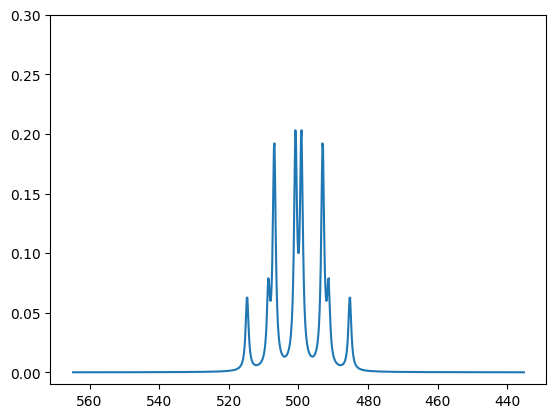

In [9]:
freq, intens = mplplot(mult_peaks, y_max=0.3)

Below is the same splitting patters with the line width tripled.

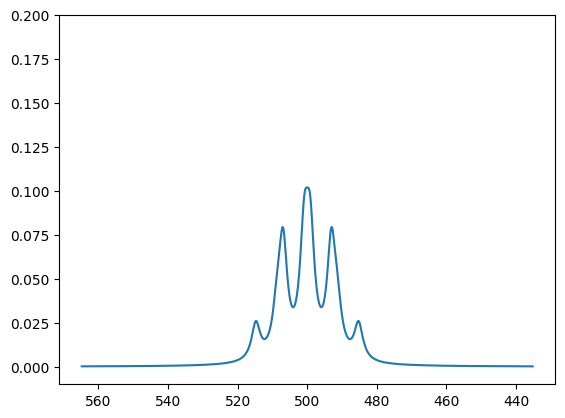

In [10]:
mplplot(mult_peaks, y_max=0.2, w=3);

As another option, we can overlay the multiplet with lines showing the exact chemical shift and intensity ratio of each peak. This can be done either using your plotting library of choice or using the `mplplot_stick()` function in nmrsim. Below the intensity of the stem plot is reduced by a fifth to keep the lines inside the blue splitting pattern.

<StemContainer object of 3 artists>

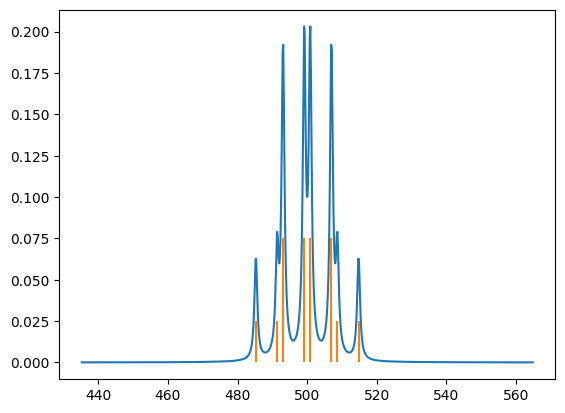

In [11]:
peaks = np.array(mult_peaks)

plt.plot(freq, intens)
plt.stem(peaks[:,0], peaks[:,1]/5, linefmt='C1', basefmt=' ', markerfmt=' ')

Entire NMR spectra can be simulated from the component resonance signals -  eithe Multiplet or SpinSystem objects. Down below, we simulate the signals for the methyl, ethyl, and -OH for ethanol with a *J*=7.3 Hz. Because the -OH peaks is broader due to exhange, the width of the resonance is increased by setting `w=3`. The three resonances are then combined into a single spectrum using the `Spectrum()` function which accepts the resonances in a list and also optionally accepts minimum (`vmin=`) and maximum (`vmax`) frequency ranges for the spectrum in Hz.

````{margin}
```{tip}
A spectrum can also be created by adding the resonance signals together with the `+` operator like below.

~~~python
spec = methyl + ethyl + OH
~~~
```
```````

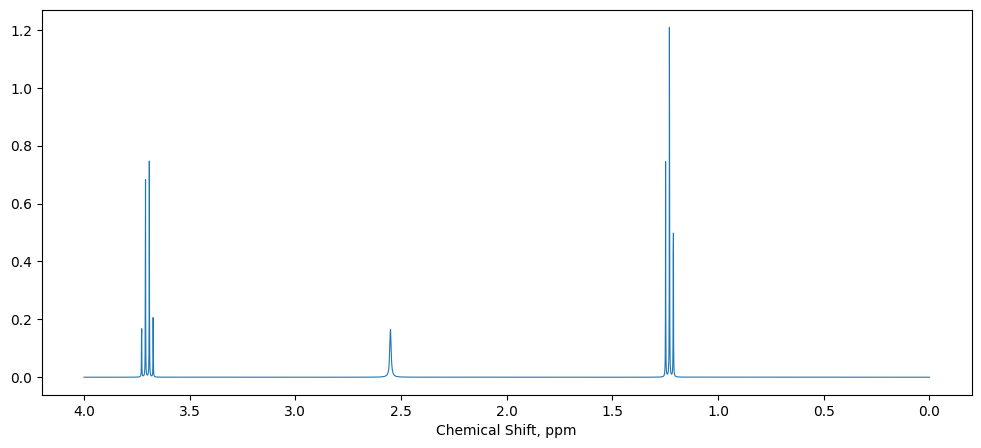

In [12]:
from nmrsim import Spectrum

# create resonances
methyl = Multiplet(492, 3, [(7.3, 2)])
ethyl = Multiplet(1480, 2, [(7.3, 3)])
OH = Multiplet(1020, 1, [], w=3)

# build spectrum
spec = Spectrum([methyl, ethyl, OH], vmin=0, vmax=1600)
v_spec, I_spec = spec.lineshape(points=4000)

# convert from Hz to ppm scale on a 400 MHz spectrometer
v_spec_ppm = v_spec / 400

plt.figure(figsize=(12,5))
plt.plot(v_spec_ppm, I_spec, linewidth=0.8)
plt.xlabel('Chemical Shift, ppm')
plt.gca().invert_xaxis()

The simulation even exhibits the second-order roofing effect where coupled resonances 'lean' towards each other.

## Simulate Second-Order Resonances

````{margin}
```{note}
The SpinSystem() function can also simulate second-order signals by setting `second_order=False`.
```
```````

nmrsim is capable of simulating second-order splitting patterns using the following functions (Table 4). The names of the function are based on the Pople nomation where letters adjanced to each other in the alphabet represent resonances that are near each other in a spectrum (e.g., A and B), letters far apart in the alphabet represent resonances further part in the spectrum (e.g., A and X), the same letter is used to represent chemically equivalent nuclei, and primes are used to differentiate chemical equivalent nuclei that are magnetically inequivalent (e.g., A and A').

**Table 4** Second-Order Simulation Functions

|  Function  | Description  | 
| :---: | :--------    |
|`AB()` | Simulates an AB system |
|`AB2()` | Simulates an AB$_2$ system |
|`ABX()` | Simulates an ABX system |
|`ABX3()` | Simulates an AB$_3$ system |
|`AAXX()` | Simulates an AA'XX' system |
|`AABB()` | Simulates an AA'BB' system |

These functions typically accept the coupling constants (e.g., `Jab=`), the distance between the two nuclei (e.g., `Vab=`), and the chemical shift of the signal (center) in Hz (`Vcentr=`). As a demonstration, below we will simulate an AB spin system where the two nuclei are coupled with *J*=10.0 Hz and separation between the two signals of 9.0 Hz.

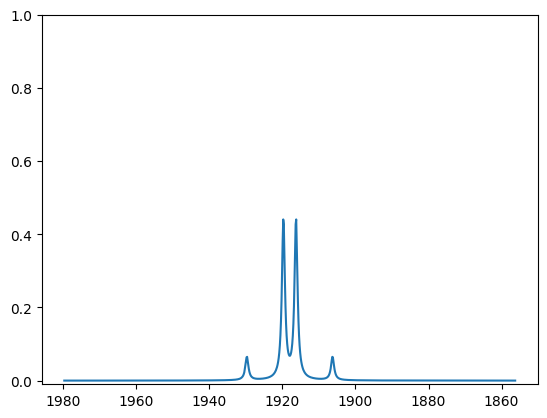

In [13]:
from nmrsim.discrete import AB

res = AB(10, 9, 1918)
mplplot(res);

If we increase the distance between the two nuclei to 30.0 Hz, no only do the two signals become futhure apart, but the second-order character (unevenness) decreases. It is important to note that when measuring the distance between the two second-order signals like this, the center of a doublet with uneven heights is not the center of the doublet but rather a weighted average frequencies of the two peaks. This means the chemical shift of a doublet is closer to the larger of the two peaks in the doublet.

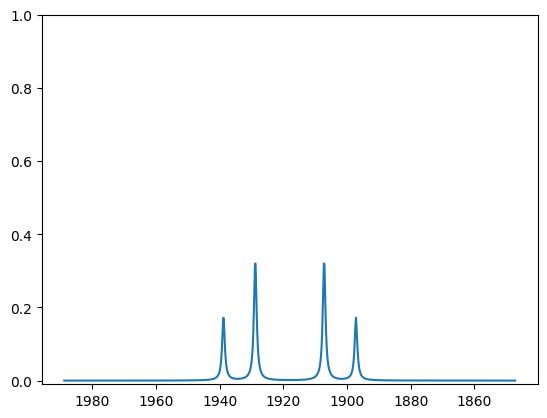

In [14]:
res = AB(10, 30, 1918)
mplplot(res);

## Dynamic NMR Simulations

Some nuclei in molecules can exchange with each other at observable rates. At lower temperatures, the signals of the two exchanging nuclei will be distinct and reasonably sharp because the exchange is relatively slow. As the temperature is increased, the exchanges becomes more rapid causing the two signals to broaden and become closer until they merge into a single peak and eventually sharpen. There are two dynamic NMR functions in the nmrsim.dnmr module: the `dnmr_two_singlets()` function simuluate two exchanging nuclei that are not coupling with each other while the `dnmr_AB()` function simulates two nuclei that couple with each other. Below we will simulate two non-coupled, singlet signals exchaning with either other. The requires aregument are the frequencies of the two nuclei during slow exchange (`va` and `vb`), the exchange rate in Hz (`k`), the half-height width of the peaks as slow exchange (`wa` and `wb`), and the fraction of the nulei in position *a* (`pa`). Optionally, you can specificy the frequencye limits for the generated line shape (`limints=`) and number of data point in the data (`points=`). 

~~~python
v, I = dnmr_two_singlets(va, vb, k, wa, wb, pa, limits=(min, max), point=800)
~~~

In [15]:
from nmrsim.dnmr import dnmr_two_singlets

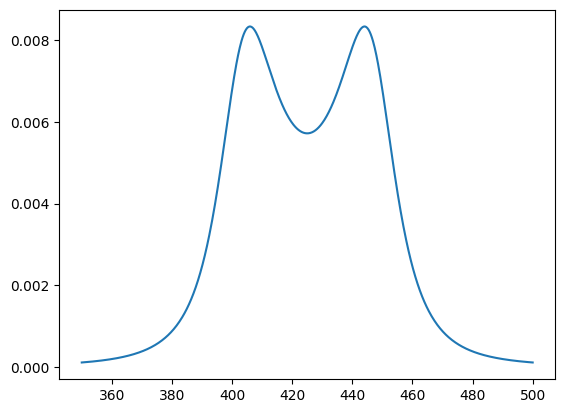

In [22]:
v, I = dnmr_two_singlets(400, 450, 70, 2, 2, 0.5)
plt.plot(v, I)